In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# for pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
# for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns


In [3]:
wine=pd.read_csv("wine.csv")
print(wine.head())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [4]:
print(wine.dtypes)
wine.groupby(wine['Type']).describe()
len(wine)
wine.shape
wine.describe()

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
wine.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

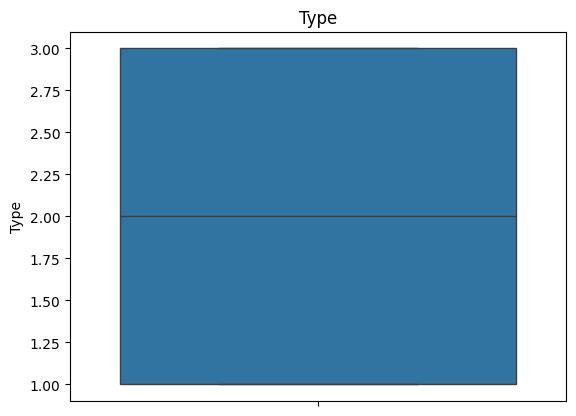

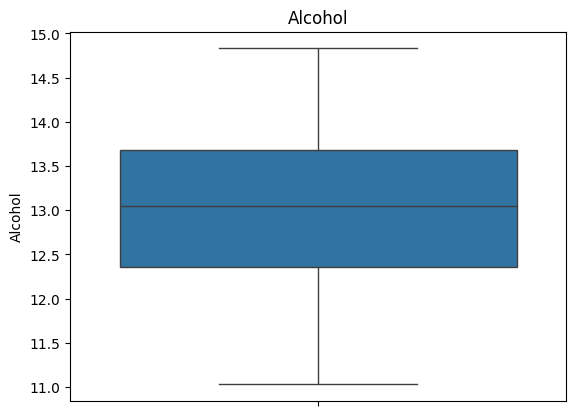

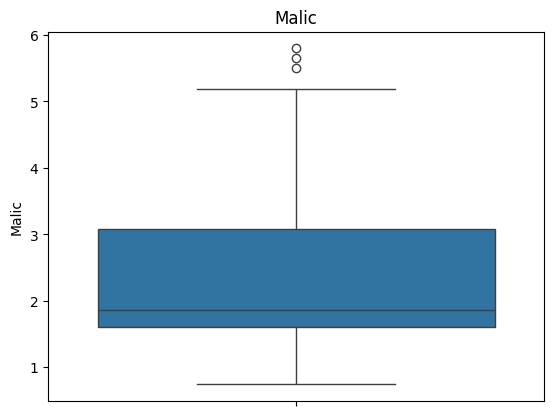

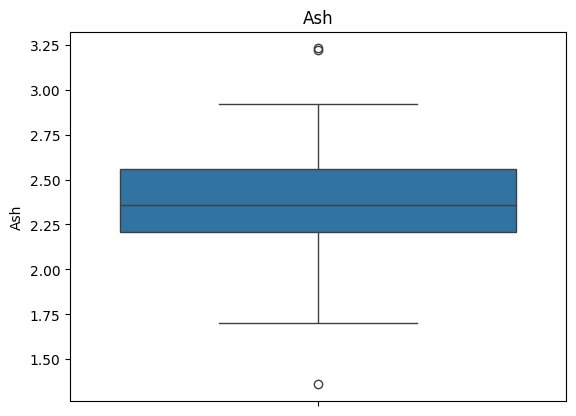

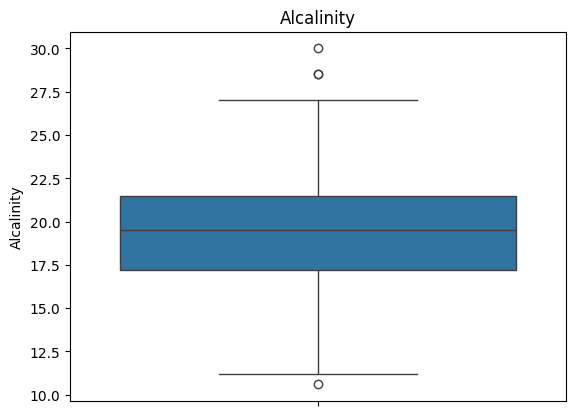

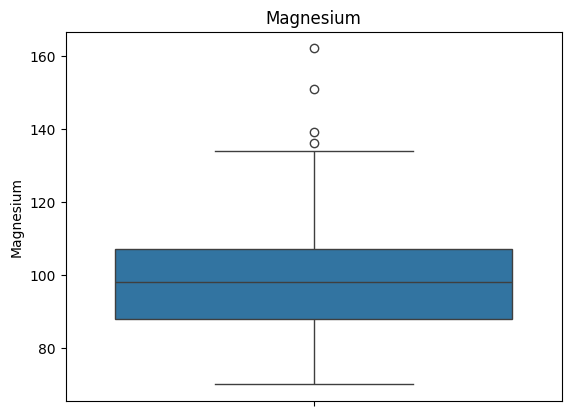

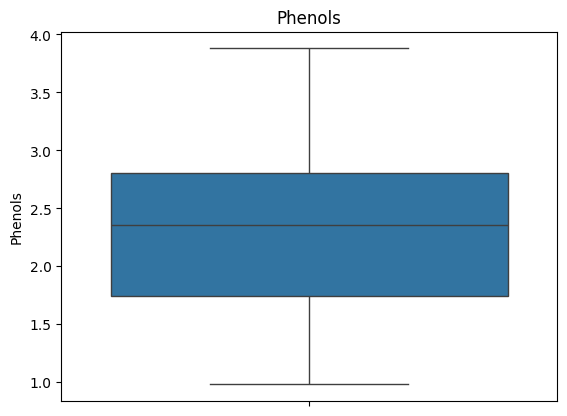

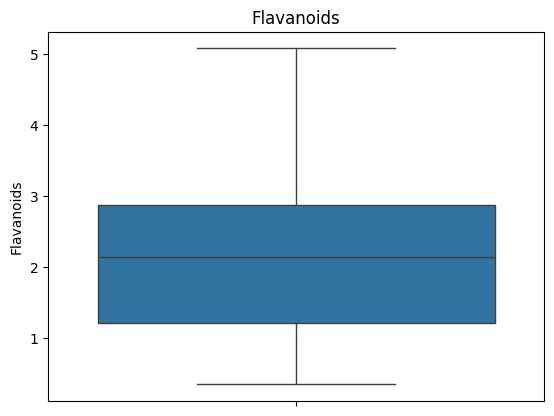

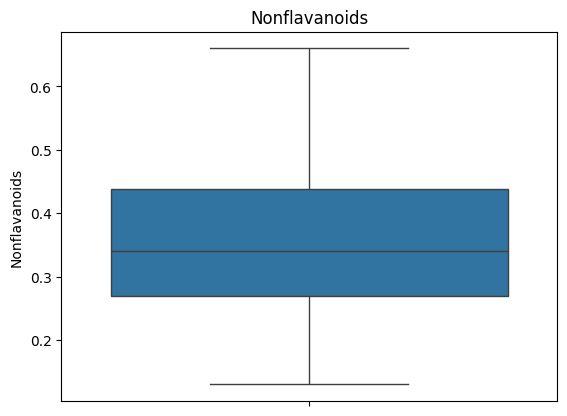

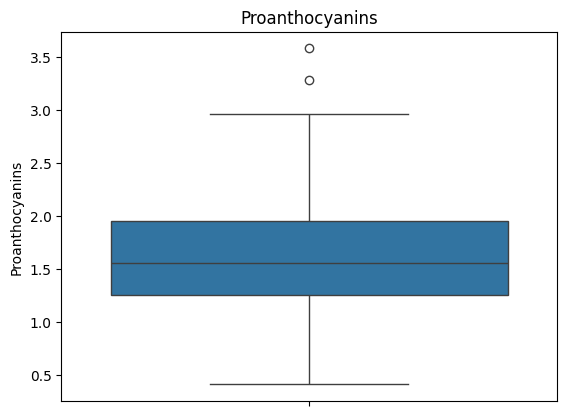

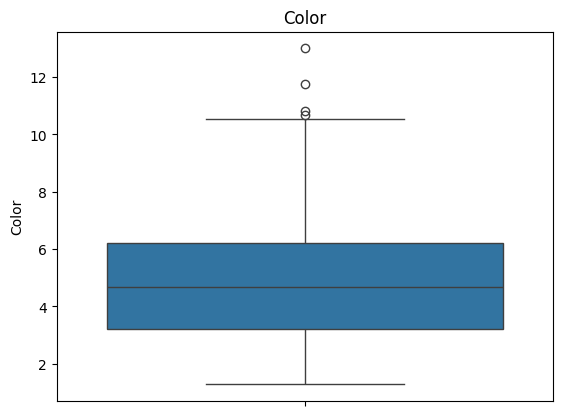

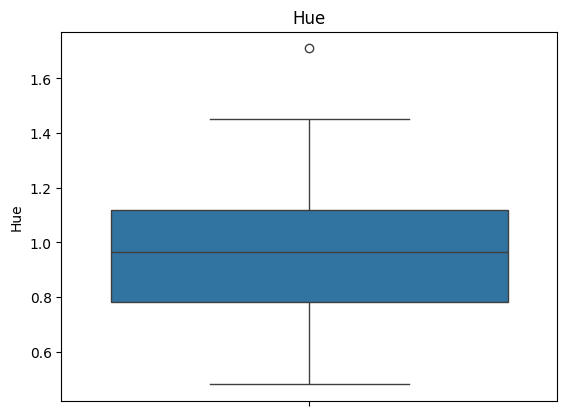

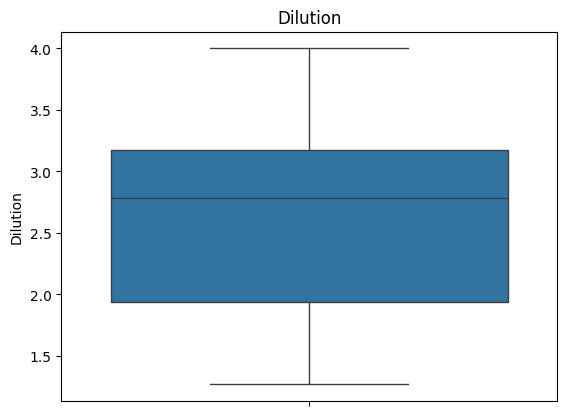

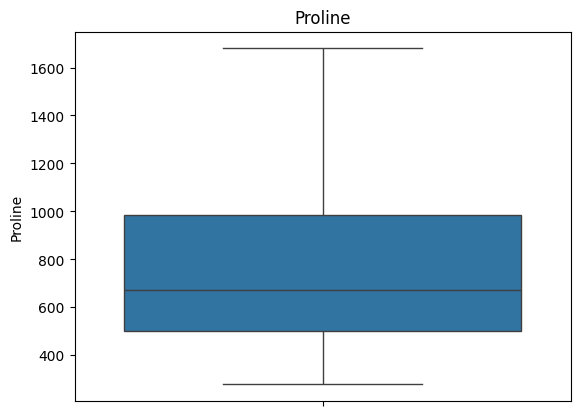

In [7]:
# SINCE THERE IS NO OBJECT DATA AND NO NULL VALUES WE WILL PROCEED TO THE NEXT STEP
# STEP2: FEATURE'S DISTRIBUTION USING HISTOGRAM BOXPLOT OR DENSITY PLOT.

for i in wine.columns:
    sns.boxplot(wine[i])
    plt.title(i)
    plt.show()

IN MALIC THREE OUTLIERS ARE THERE, IN ASH 2 OUTLIERS, IN ALCALINITY 3 OUTLIERS, MAGNNESIUM 4, proanthocyanins 2,colour 4, Hue 1. Rest of them have no outliers.

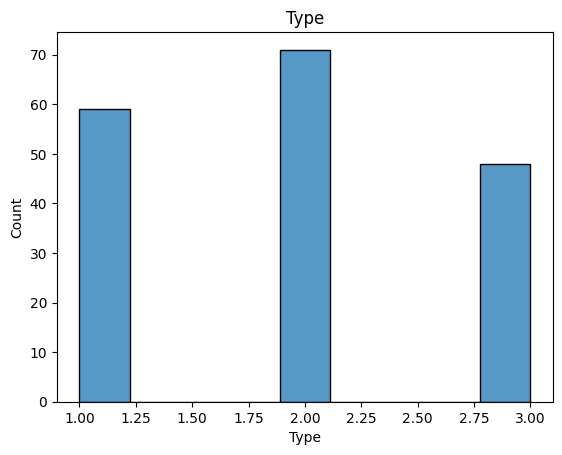

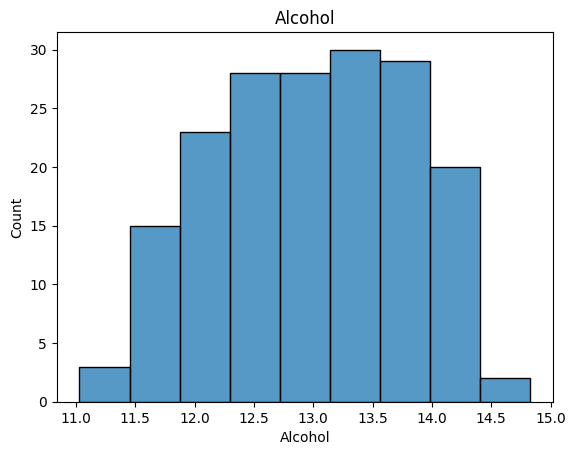

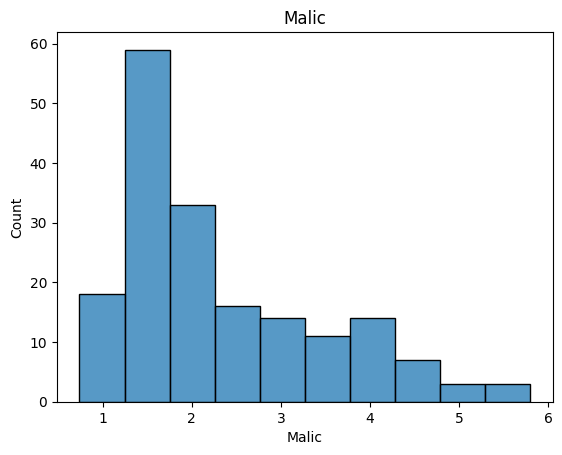

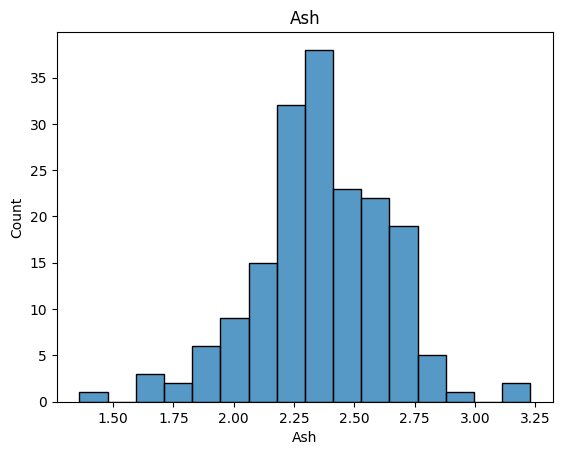

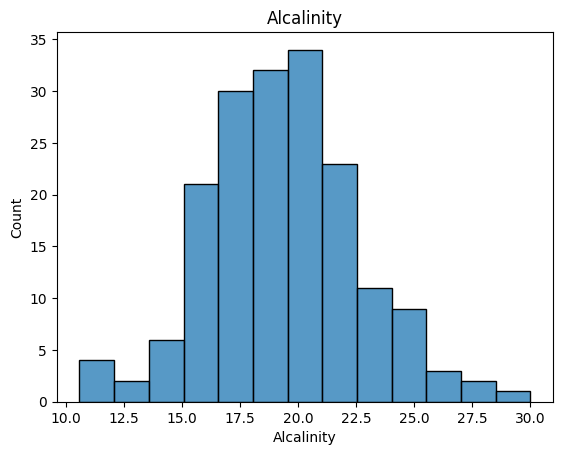

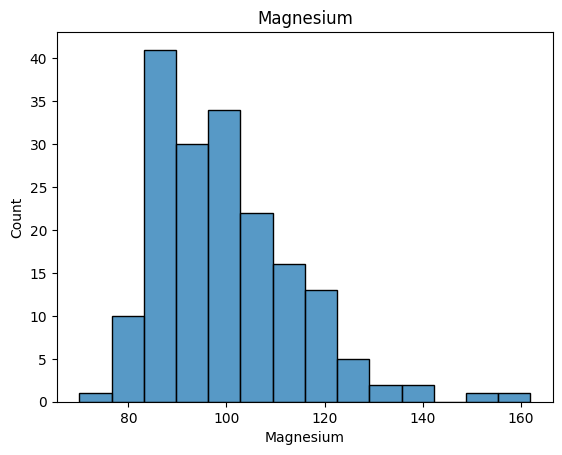

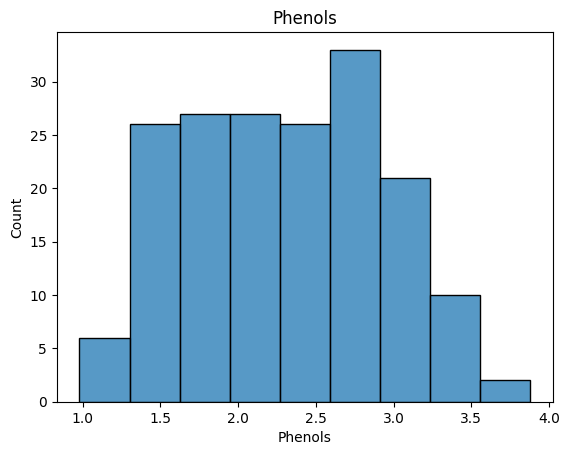

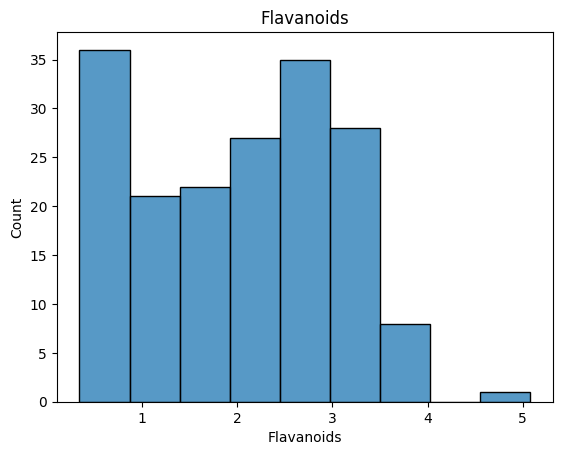

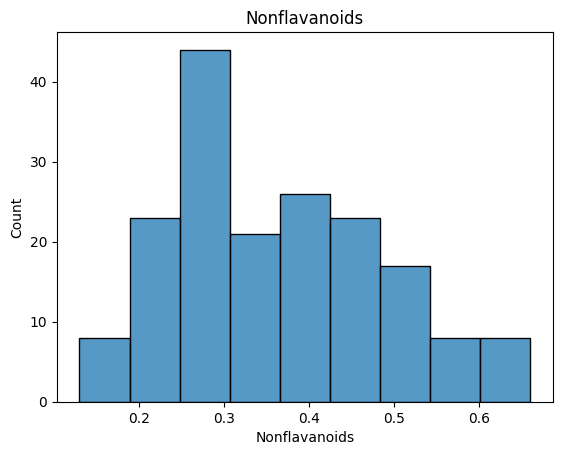

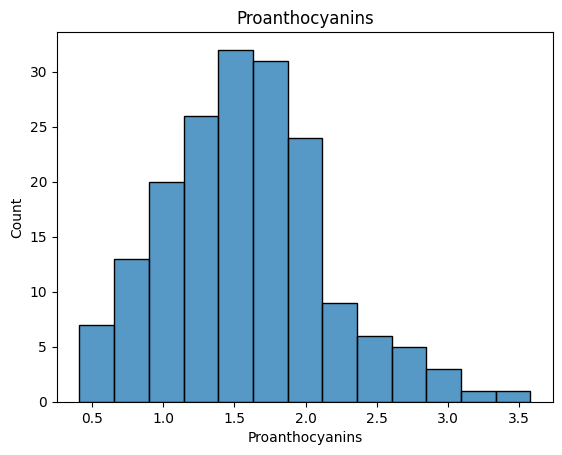

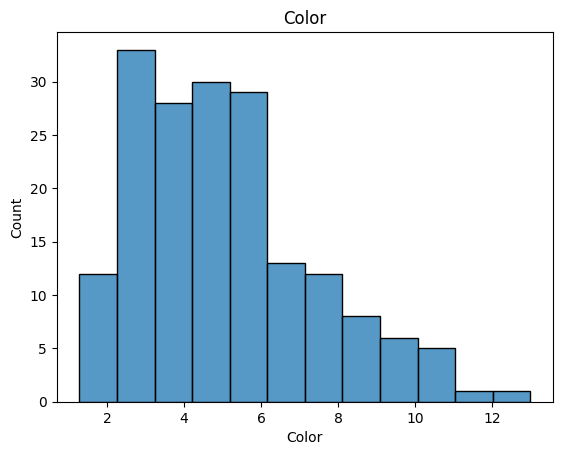

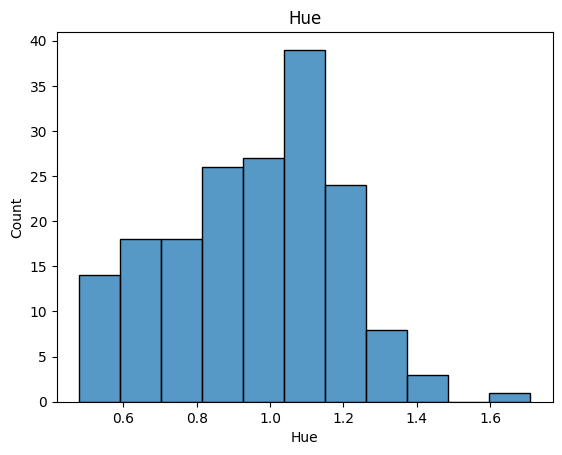

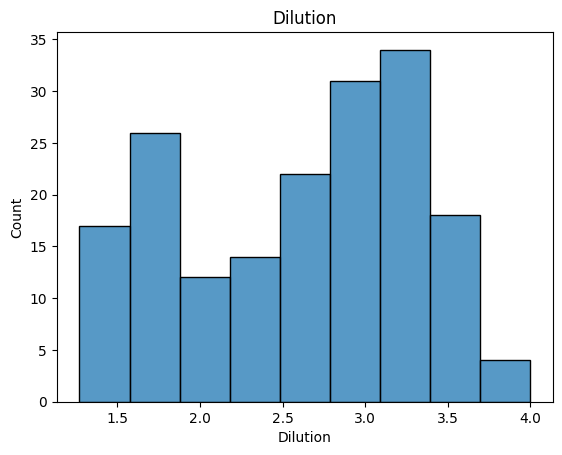

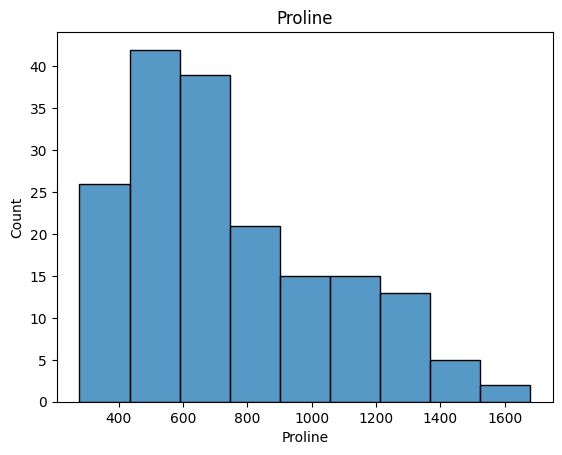

In [ ]:
for i in wine.columns:
    sns.histplot(wine[i])  # plt.hist() can also be used
    plt.title(i)
    plt.show()

<ipython-input-14-34487af71115>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[i])


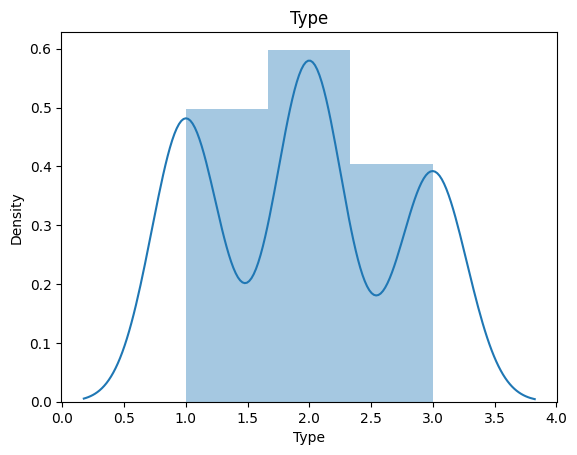

<ipython-input-14-34487af71115>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[i])


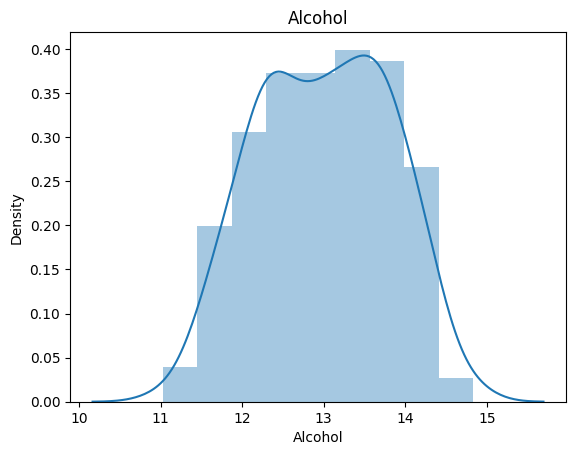

<ipython-input-14-34487af71115>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[i])


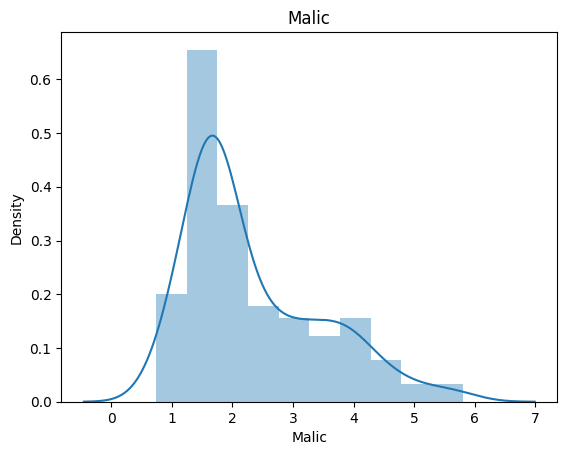

<ipython-input-14-34487af71115>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[i])


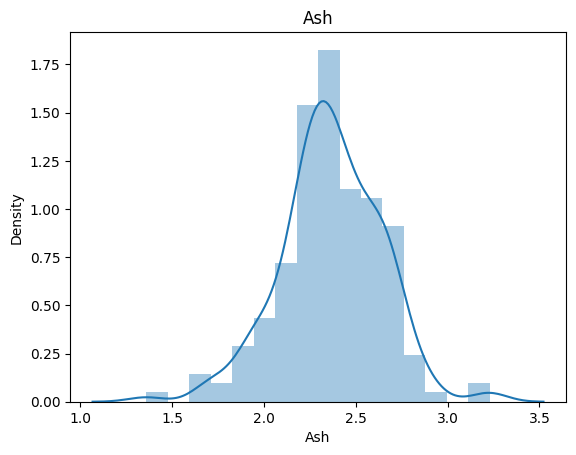

<ipython-input-14-34487af71115>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[i])


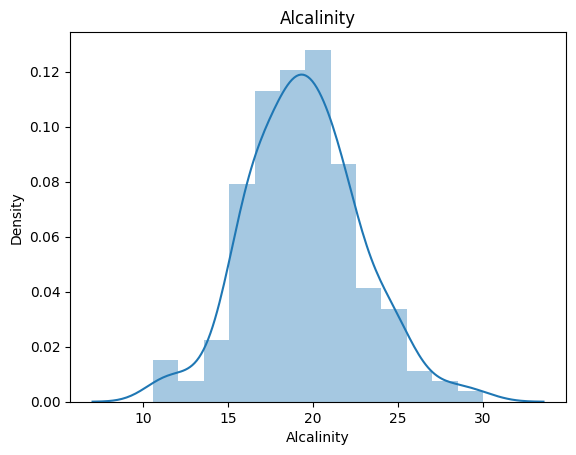

<ipython-input-14-34487af71115>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[i])


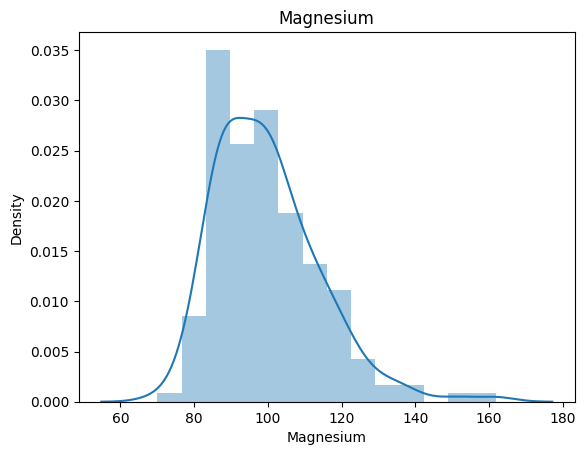

<ipython-input-14-34487af71115>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[i])


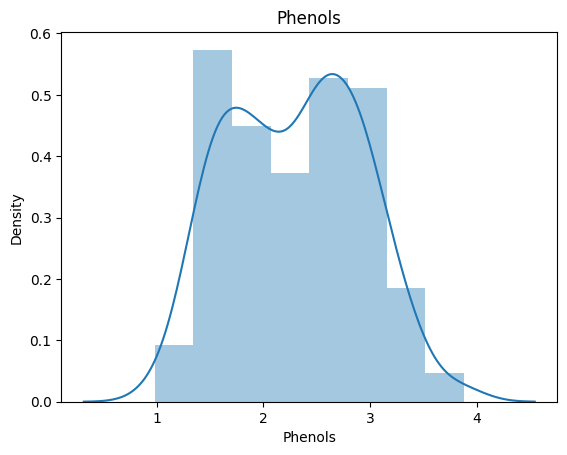

<ipython-input-14-34487af71115>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[i])


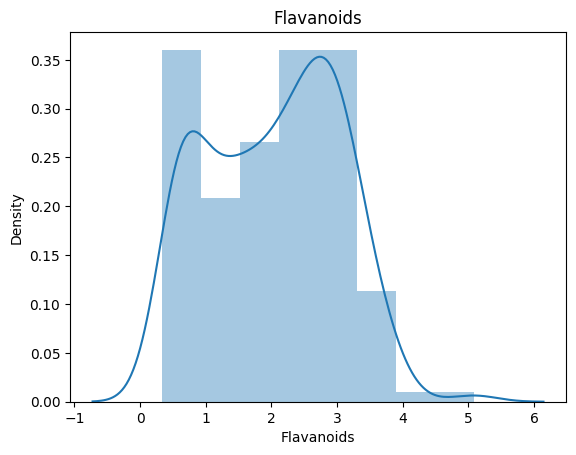

<ipython-input-14-34487af71115>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[i])


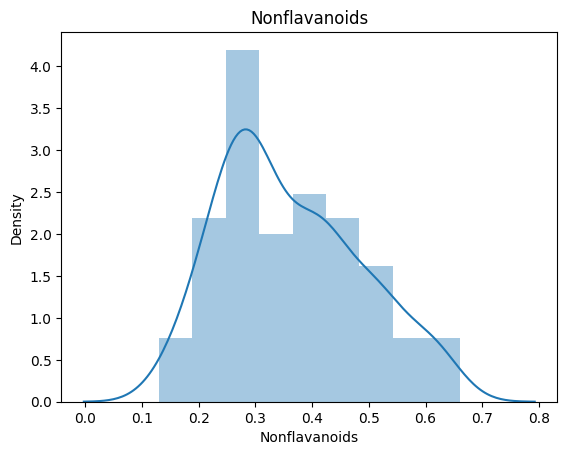

<ipython-input-14-34487af71115>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[i])


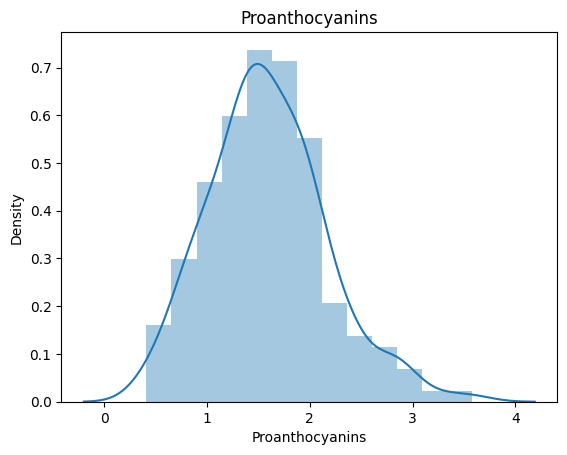

<ipython-input-14-34487af71115>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[i])


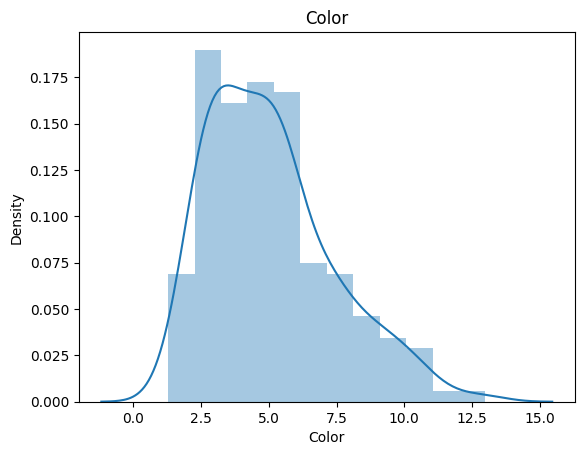

<ipython-input-14-34487af71115>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[i])


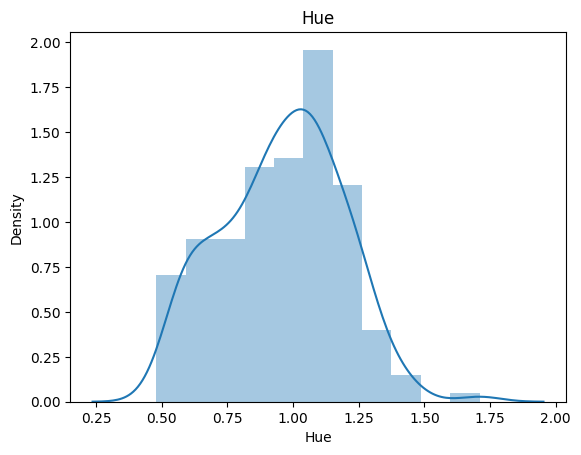

<ipython-input-14-34487af71115>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[i])


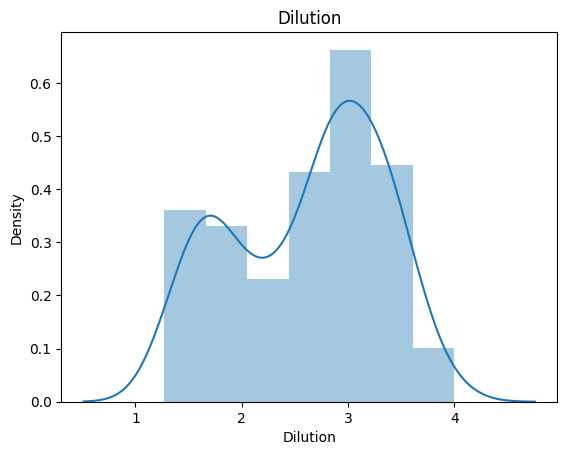

<ipython-input-14-34487af71115>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine[i])


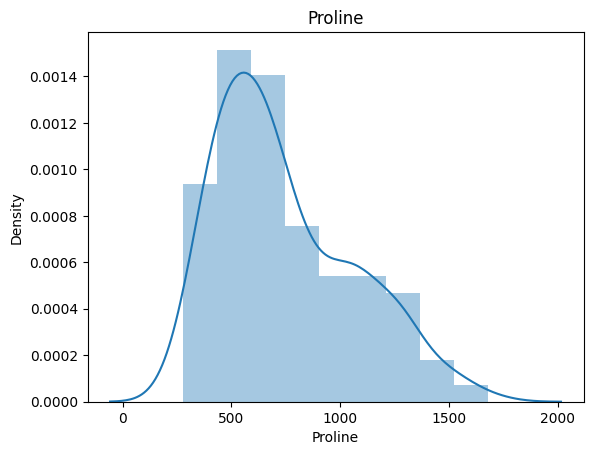

In [ ]:
# density plot
for i in wine.columns:
    sns.distplot(wine[i])
    plt.title(i)
    plt.show()

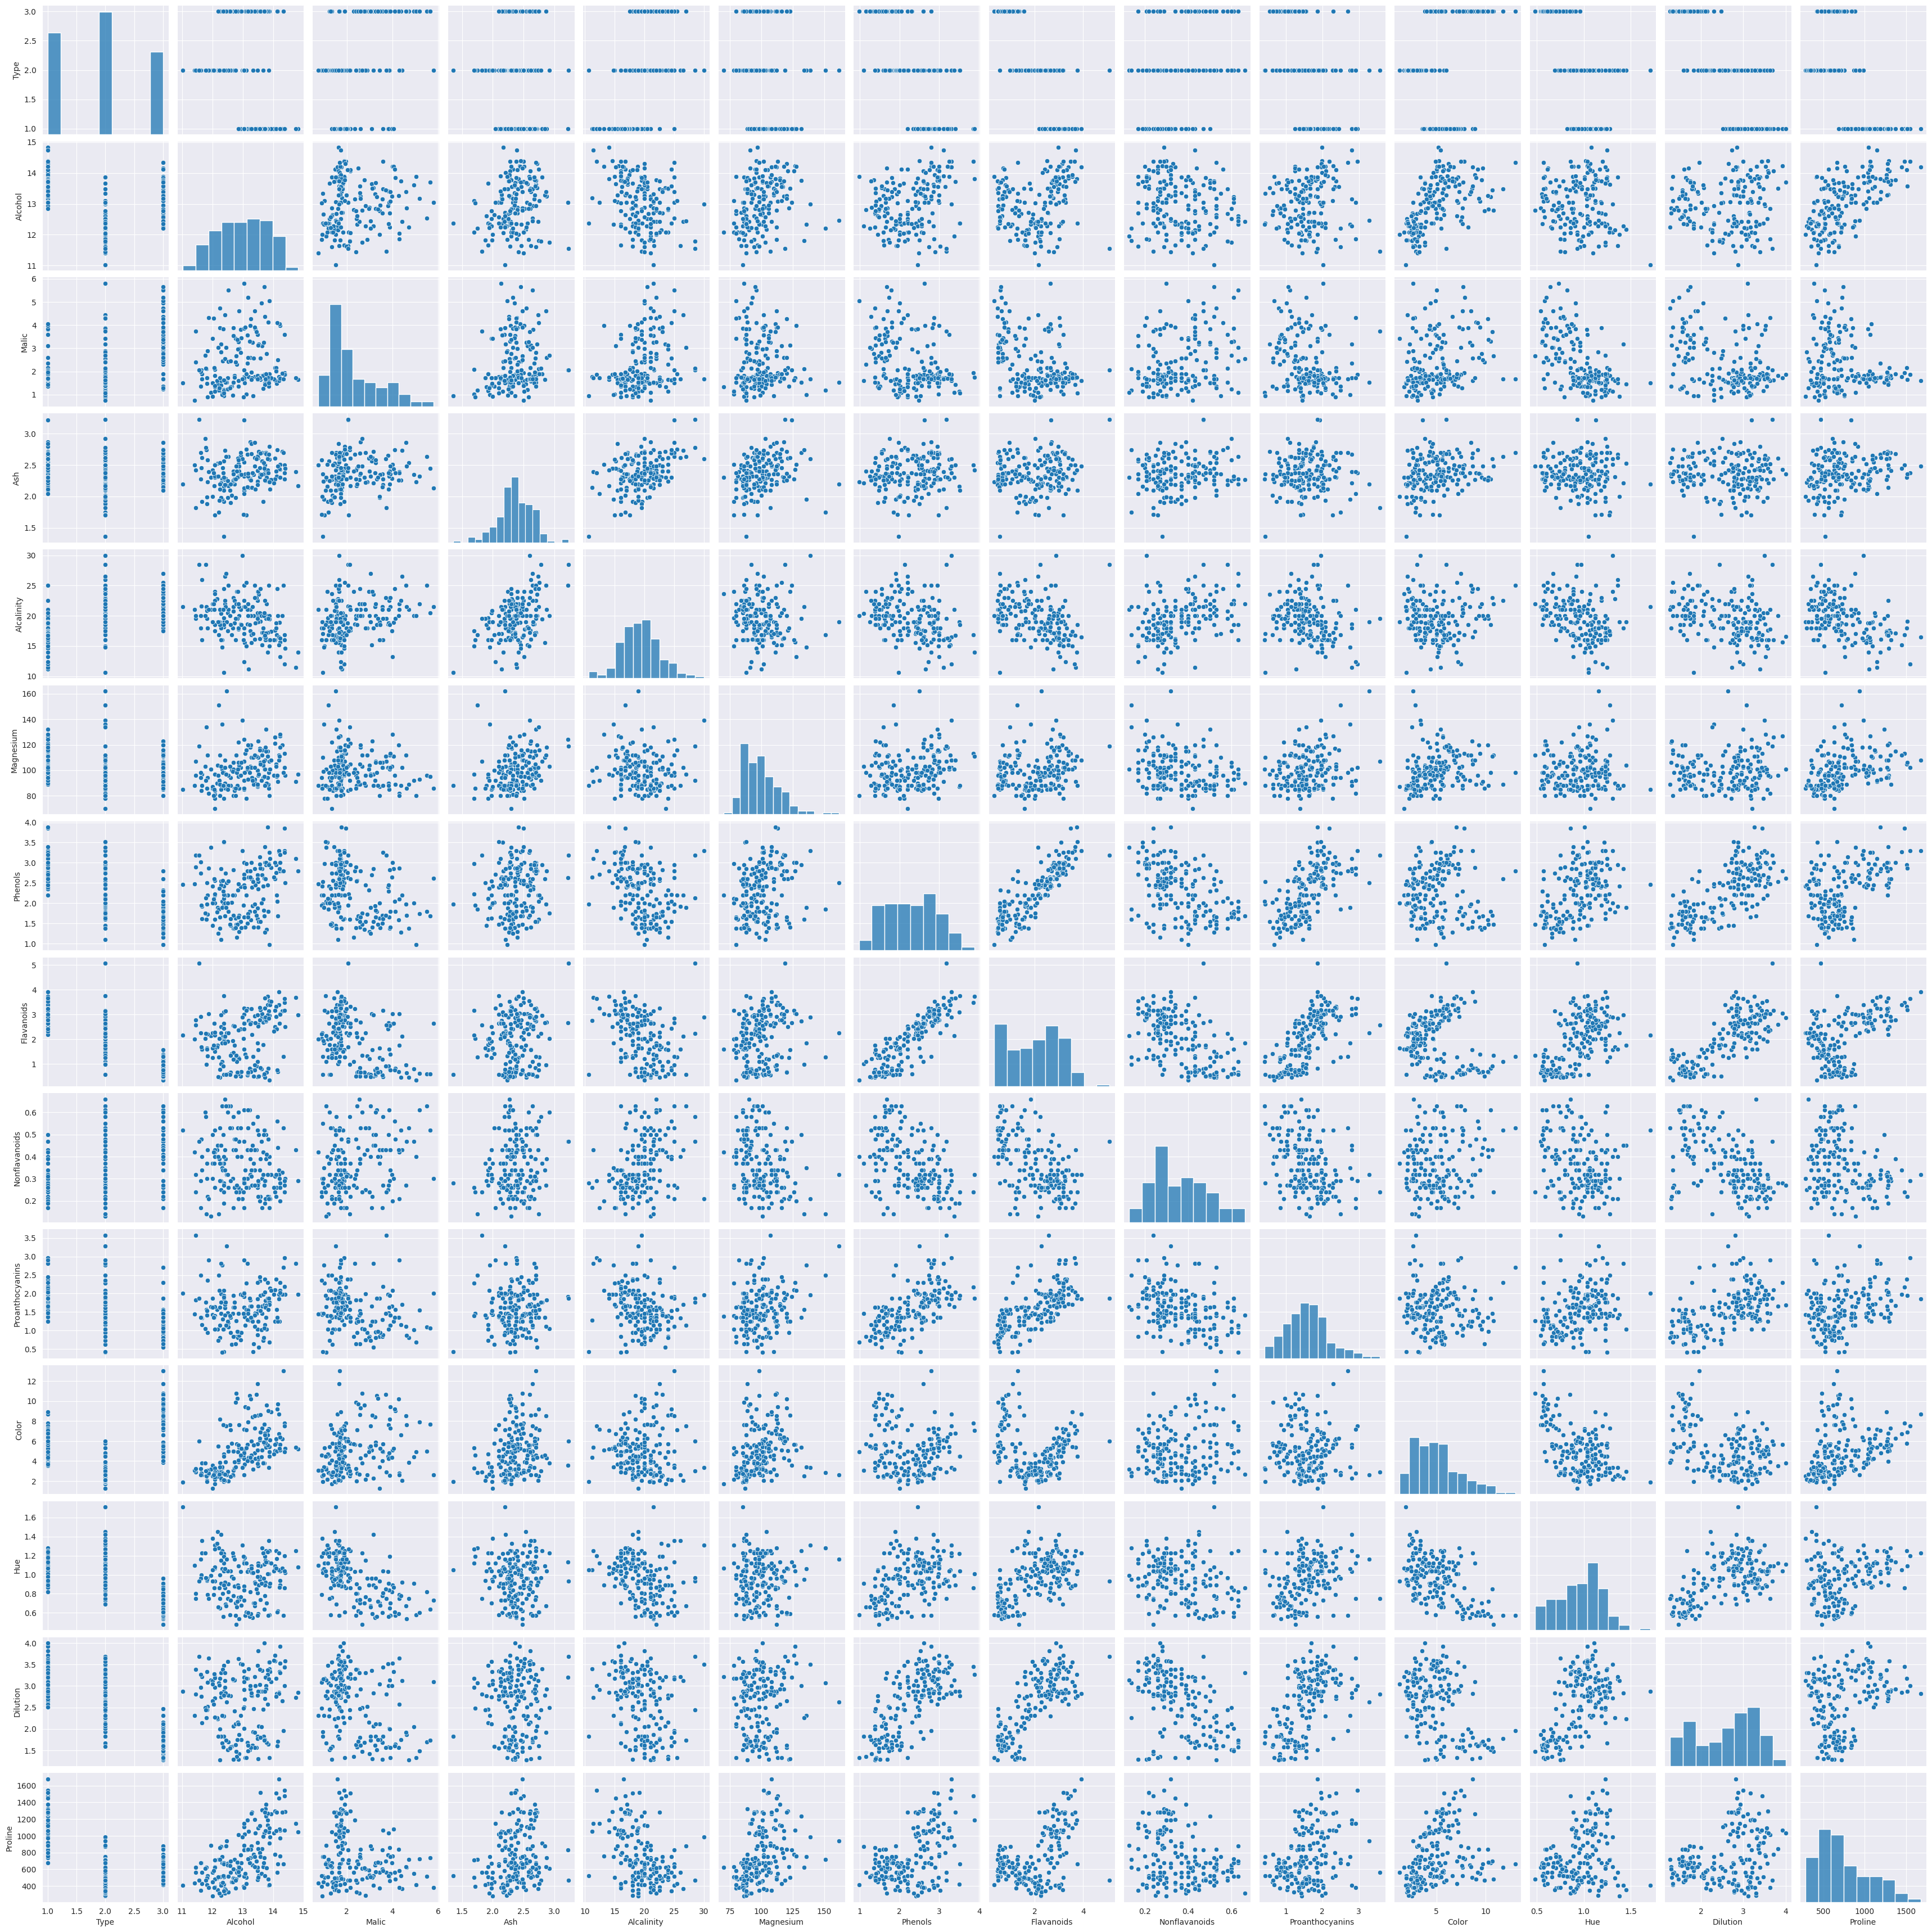

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(wine)
plt.show()

In [ ]:
wine.corr(method='pearson') # step 3

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


the correlation between colour and alcohol and proline and alcohol is positive and moderate. phenols and flavonoids is having high correlation,phenols and dilution is having correlation close to 0.7 which is not too high neither less. dilution and flavonoids is having cosiderable correlation i.e high and positive.

In [9]:
# Task 2, Dimensionality reducion with pca
#let us not disturb the orignal data.
#
wine1=wine.copy()
wine1.head()
# Considering only numerical data which will be obtained by dropping type column
# because type is the different type of wine or can say lavel of wine
wine_1=wine1.iloc[:,1:]
print(wine_1.head())

   Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [10]:
# standardize the features
scalar=StandardScaler()
wine_1_scaled=scalar.fit_transform(wine_1)
print(wine_1_scaled) # normaization
# one can use scale(wine1) by importing scale from sklearn.preprocessing

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


In [37]:
# Perform PCA (main step 2)
pca = PCA(n_components=6)
principal_components = pca.fit_transform(wine_1_scaled)
principal_components

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284,
        -0.22388013],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832, -0.25765463,
        -0.92712024],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231, -0.25103312,
         0.54927605],
       ...,
       [-2.67783946, -2.76089913, -0.94094188,  0.31203475,  1.271355  ,
         0.27306792],
       [-2.38701709, -2.29734668, -0.5506962 , -0.68828455,  0.81395522,
         1.17878298],
       [-3.20875816, -2.76891957,  1.01391366,  0.59690319, -0.89519259,
         0.29609218]])

In [38]:
np.shape(principal_components)

(178, 6)

In [13]:
# Create DataFrame with principal component scores
PCA_comp_df=pd.DataFrame(data=principal_components,columns=['pc1','pc2','pc3','pc4','pc5','pc6'])
PCA_comp_df.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520


 if we dont give the n components then it will give more than required number of components that is if we give this code:
 pca = PCA()
 principal_components = pca.fit_transform(wine1_scaled)
 principal_components
 PCA_comp_df1=pd.DataFrame(data=principal_components)
 PCA_comp_df1

 hence it is important to give the number of components we want (dimension we want)

In [16]:
np.round(PCA_comp_df.corr(method='pearson'),4)

,pc1,pc2,pc3,pc4,pc5,pc6
pc1,1.0,-0.0,0.0,-0.0,-0.0,-0.0
pc2,-0.0,1.0,0.0,-0.0,0.0,-0.0
pc3,0.0,0.0,1.0,-0.0,0.0,0.0
pc4,-0.0,-0.0,-0.0,1.0,0.0,-0.0
pc5,-0.0,0.0,0.0,0.0,1.0,-0.0
pc6,-0.0,-0.0,0.0,-0.0,-0.0,1.0


In [17]:
# The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823])

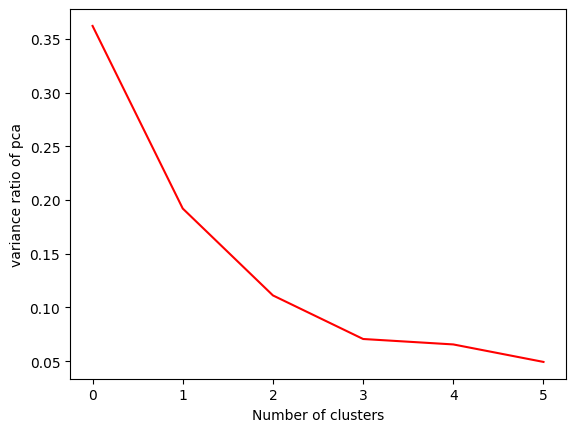

In [43]:
# Variance plot for PCA components obtained
plt.plot(var,color="red")
plt.xlabel('Number of clusters')
plt.ylabel('variance ratio of pca')
plt.show()

it is clear that variance ratio is decraesing wrt increase in number of clusters so it can be cosidered that 3 to 4 dimensions are good enough.

In [ ]:
# cummulative variance
var=np.cumsum(np.round(var,decimals=4)*100)

In [ ]:
var

array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 ])

[0.36198848 0.1920749  0.11123631 0.0706903 ]


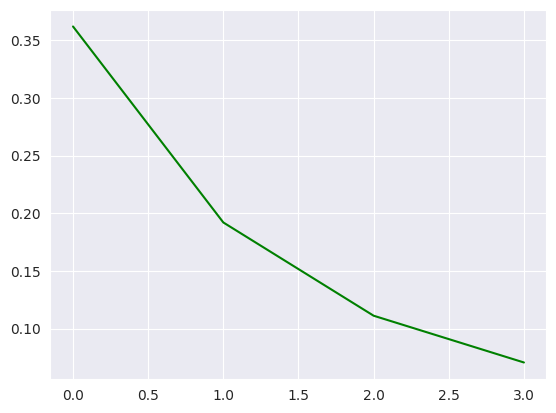

[36.2  55.41 66.53 73.6 ]


In [ ]:
# for the data wine1 , we can see in the graph for amount of var of each pca is that
# it can be seen that 4 components will be good enough (optimal)
pca = PCA(n_components=4)
# transformation of orignal data into pca by
# copying the original data so that  orignal data can not be disturbed.

principal_components1 = pca.fit_transform(wine_1_scaled)
principal_components1

# Create DataFrame with principal component scores
PCA_comp_df1=pd.DataFrame(data=principal_components1,columns=['pc1','pc2','pc3','pc4'])
PCA_comp_df1.head()

# The amount of variance that each PCA explains is
var1 = pca.explained_variance_ratio_
print(var1)

# Variance plot for PCA components obtained
plt.plot(var1,color="green")
plt.show()

# Cumulative variance
var1 = np.cumsum(np.round(var1,decimals = 4)*100)
print(var1)


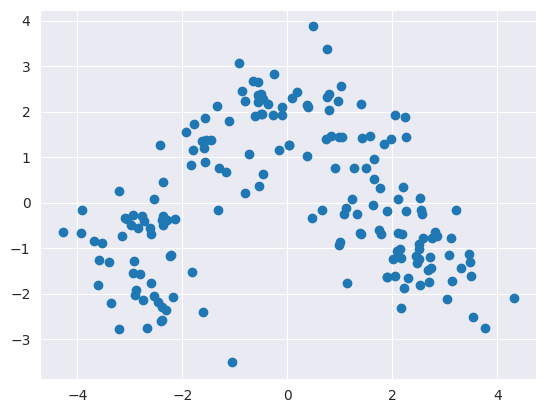

In [ ]:
# plot between PCA1 and PCA2
x = principal_components[:,0]
y = principal_components[:,1]
plt.scatter(x,y)

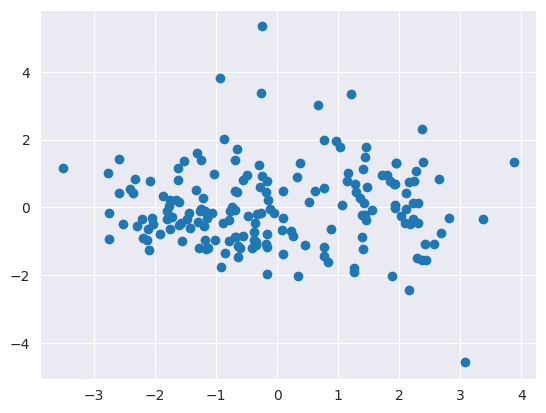

In [ ]:
# plot between PCA2 and PCA3
x = principal_components[:,1]
y = principal_components[:,2]
plt.scatter(x,y)

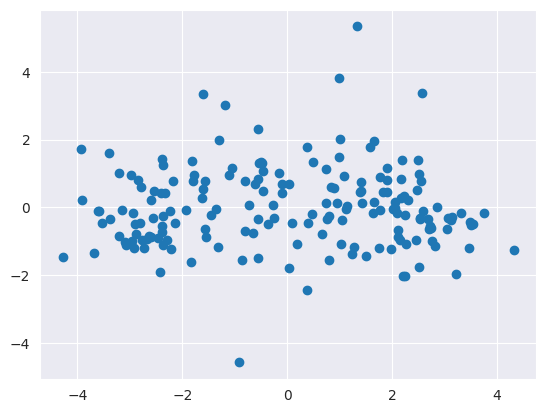

In [ ]:
# plot between PCA1 and PCA3
x = principal_components[:,0]
y = principal_components[:,2]
plt.scatter(x,y)

In [22]:
# task 3 : clustering with original data
wine2=wine.copy() # first make copy of orignal data
wine2.head()
wine_2=wine2.iloc[:,1:]

In [23]:
# Similar to the sklearn.preprocessing, StandardScaler function
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)
x=norm_func(wine_2)
x

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.873810,2.966176,0.304301,0.300954,-0.331985,-0.982841,-1.420891,1.270726,-0.927563,1.139596,-1.388840,-1.227742,-0.021890
174,0.491955,1.408636,0.413653,1.049555,0.158126,-0.791103,-1.280731,0.547563,-0.316058,0.967055,-1.126341,-1.481267,0.009866
175,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786
176,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664


In [24]:
scaled_wine_2 = scalar.fit_transform(wine2.iloc[:,1:])


In [25]:
scaled_wine_2

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

[2301.0, 1649.6876977722113, 1271.5767270613835, 1169.100107466792, 1106.7679558638927, 1038.2124422954255, 993.9339227351712, 946.1462791968667, 884.5336128804034, 847.0955346699341]


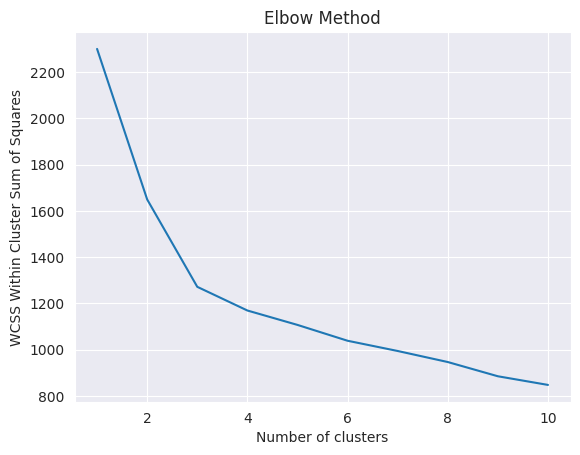

In [ ]:

#The K-means algorithm aims to choose centroids
# that minimise the inertia, or within-cluster sum-of-squares criterion:
# 1.Apply a clustering algorithm (e.g., K-means) to the original dataset.
# WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Within Cluster Sum of Squares')
plt.show()

# the iteration has benn done for i number of clusters
# that is checked using i from 1 to 10 and for each model wccs has been calculated and
# appended in the wccs list.
# in the plot wccs has been plotted against the number of clusters i.

we can see that there is an elbow point at 2,3,4,6 after this the points have not much decreasing rate in wccs wrt no. of clusters and it is slowing down after 4 and much after 6.

# considering optimalnumber of clusters as 4 will be fine.

In [ ]:
new_cluster= KMeans(n_clusters=4,n_init=10,random_state=0)
new_cluster.fit(x)
new_cluster.labels_  # kmeans label

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 2, 3, 2,
       2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 1, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
wine2['new_cluster']=new_cluster.labels_
# this assigns cluster's labels to the data set

In [ ]:
wine2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,new_cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [ ]:
#These are standardized values.
new_cluster.cluster_centers_

array([[ 0.97965256, -0.36075405,  0.23274981, -0.82971009,  0.44726511,
         0.90614191,  0.98926681, -0.61604411,  0.55363675,  0.26163285,
         0.47134361,  0.75141829,  1.27225872],
       [ 0.1860184 ,  0.90242582,  0.24850925,  0.58206156, -0.05049296,
        -0.98577624, -1.2327174 ,  0.71482528, -0.74749896,  0.98571769,
        -1.18794772, -1.2978785 , -0.37897557],
       [-0.69771608, -0.03080423,  0.12557551,  0.28743122,  0.30719162,
         0.63353819,  0.59108237, -0.5643965 ,  0.85566297, -0.69768994,
         0.33011012,  0.65233741, -0.48531316],
       [-0.91788504, -0.54052761, -0.65087008,  0.16756729, -0.70911594,
        -0.46064344, -0.25774565,  0.3576417 , -0.44987472, -0.92727166,
         0.51189704,  0.06356816, -0.79744227]])

In [ ]:
wine2.groupby('new_cluster')

In [ ]:
wine2.groupby('new_cluster').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
new_cluster,,,,,,,,,,,,,,
0,1.000000,13.795926,1.933333,2.430370,16.724074,106.129630,2.862222,3.017407,0.285185,1.907778,5.664630,1.065185,3.145185,1147.537037
1,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
2,1.838710,12.434194,2.301935,2.400968,20.454839,104.129032,2.691613,2.619677,0.291613,2.080645,3.440645,1.032903,3.074839,594.064516
3,2.000000,12.255455,1.732500,2.187955,20.054545,89.613636,2.006818,1.771818,0.406364,1.333409,2.908409,1.074455,2.656818,495.772727


this gives the mean for each cluster

In [ ]:
#3.	Evaluate the clustering performance using metrics such as
#  silhouette score or Davies–Bouldin index.

# Evaluate silhouette score
# x is scaled data frame for which we want clusters

from sklearn.metrics import silhouette_score, davies_bouldin_score
# for 4 clusters
silhouette_avg = silhouette_score(x, new_cluster.labels_ )
print(f"Silhouette Score: {silhouette_avg}")

# Evaluate Davies–Bouldin index
db_index = davies_bouldin_score(x, new_cluster.labels_)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.25173343011696475
Davies-Bouldin Index: 1.8172221736430867


In [ ]:
 # checking the silhoutee score for 3 clusers
new_cluster1= KMeans(n_clusters=3,n_init=10,random_state=0)
new_cluster1.fit(x)
new_cluster1.labels_  # kmeans label

silhouette_avg = silhouette_score(x, new_cluster1.labels_ )
print(f"Silhouette Score: {silhouette_avg}")

# Evaluate Davies–Bouldin index
db_index = davies_bouldin_score(x, new_cluster1.labels_)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.28594199657074876
Davies-Bouldin Index: 1.391793832317738


In [49]:
new_cluster_revised= KMeans(n_clusters=3,n_init=10,random_state=0)
new_cluster_revised.fit(x)
new_cluster_revised.labels_  # kmeans label

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [50]:
wine2['new_cluster_revised']=new_cluster_revised.labels_
# this assigns cluster's labels to the data set

In [51]:
wine2

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,new_cluster_revised
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [ ]:
 # checking the silhoutee score for 5 clusers
new_cluster2= KMeans(n_clusters=5,n_init=10,random_state=0)
new_cluster2.fit(x)
new_cluster2.labels_  # kmeans label

silhouette_avg = silhouette_score(x, new_cluster2.labels_ )
print(f"Silhouette Score: {silhouette_avg}")

# Evaluate Davies–Bouldin index
db_index = davies_bouldin_score(x, new_cluster2.labels_)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.23187479572412728
Davies-Bouldin Index: 1.6946360152117461


In [ ]:
 # checking the silhoutee score for 6 clusers
new_cluster1= KMeans(n_clusters=6,n_init=10,random_state=0)
new_cluster1.fit(x)
new_cluster1.labels_  # kmeans label

silhouette_avg = silhouette_score(x, new_cluster1.labels_ )
print(f"Silhouette Score: {silhouette_avg}")

# Evaluate Davies–Bouldin index
db_index = davies_bouldin_score(x, new_cluster1.labels_)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.23964277899912417
Davies-Bouldin Index: 1.5697572506077266


In [ ]:
no_of_clusters=[3,4,5,6]
sill_score=[0.2859,0.25173,0.23187,0.23964]
davis_score=[1.39179,1.81722,1.6946,1.56975]
df=pd.DataFrame(columns=[no_of_clusters,sill_score,davis_score])

In [ ]:
df

,3,4,5,6
,0.28590,0.25173,0.23187,0.23964
,1.39179,1.81722,1.69460,1.56975


we can see that 3 clusters have highest sillhoutee score and lowest david_bouldin index. there fore it can be said that 3 clusters should be optimal number of clusters.

Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.
2.	Visualize the clustering results obtained from PCA-transformed data.
3.	Compare the clustering results from PCA-transformed data with those from the original dataset.


In [39]:
# first let us make copy of pca transformed df

PCA_comp_df1=PCA_comp_df.copy()
PCA_comp_df1.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520


[1969.1704059701876, 1314.8296825916577, 934.6771823439253, 835.595313157499, 770.973318106815, 709.6527929495702, 660.0836255910904]


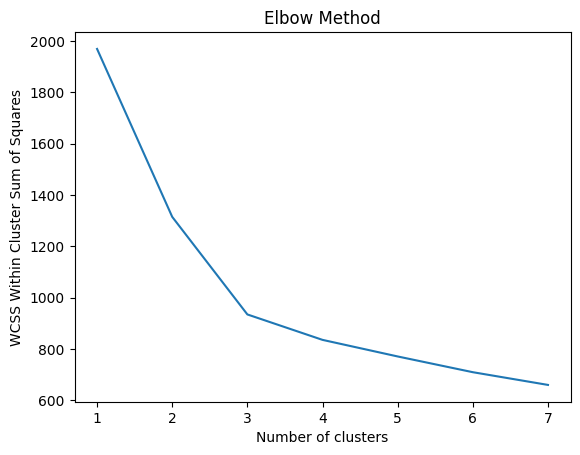

In [42]:
# Apply the same clustering algorithm to the PCA-transformed dataset.
# the data set is already standardized

wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,n_init=10,random_state=0)
    kmeans.fit(PCA_comp_df1)
    wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Within Cluster Sum of Squares')
plt.show()


here also it is clearly visible that after 3 number of clusters, wccs is slowing down so the optimal number of clusters can be 3 and in pca also

In [45]:
 # clustering the pca components
 # checking the silhouette score for 3 clusers made using pca with 6 dimensions df

from sklearn.metrics import silhouette_score, davies_bouldin_score
new_cluster1_pca= KMeans(n_clusters=3,n_init=10,random_state=0)
new_cluster1_pca.fit(PCA_comp_df1)
new_cluster1_pca.labels_  # kmeans label

silhouette_avg = silhouette_score(PCA_comp_df1, new_cluster1_pca.labels_ )
print(f"Silhouette Score: {silhouette_avg}")

# Evaluate Davies–Bouldin index
db_index = davies_bouldin_score(PCA_comp_df1, new_cluster1_pca.labels_)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.3462566199998671
Davies-Bouldin Index: 1.1566758526209966


In [46]:
new_cluster1_pca.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [47]:
# as we have clusterd the pca data frame so we will label them under cluster labels
PCA_comp_df1['new_cluster1_pca']=new_cluster1_pca.labels_
# this assigns cluster's labels to the data set

In [48]:
PCA_comp_df1

,pc1,pc2,pc3,pc4,pc5,pc6,new_cluster1_pca
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,2
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,2
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,2
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,2
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,2
...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0


# comaprision for cluster made for orignal data and pca transformed.
silhoutte and davies bouldin score for cluster formed from  pca: (3 clusters)
Silhouette Score: 0.3462566199998671
Davies-Bouldin Index: 1.1566758526209966


silhoutte and davies bouldin score for orignal data:  (3 clusters)

Silhouette Score: 0.28594199657074876
Davies-Bouldin Index: 1.391793832317738


Task 5: Comparison and Analysis:
1.	Compare the clustering results obtained from the original dataset and PCA-transformed data.
2.	Discuss any similarities or differences observed in the clustering results.
3.	Reflect on the impact of dimensionality reduction on clustering performance.
4.	Analyze the trade-offs between using PCA and clustering directly on the original dataset.
Task 6: Conclusion and Insights


similarity is that clustering done for original data and pca transformed data is good with 3 clusters as an optimum number of clusters.
silhoutte score for pca transformed data is higher than the clusters obtained from original data whereas db index for pca transformed data is lower than the clusters obtained from original data.

impact of dimensionality reduction: pca help to overcome with the problem of overfitting by capturing the important features and discarding the noisey data. This leads to form better clusters by improving the performance.
Pca helps to reduce the high dimentional data in 2 or 3 dimensioned data, this is easy for visualize.
Clustering algorithms often have a higher computational cost in high-dimensional spaces. Dimensionality reduction can reduce this computational burden by simplifying the data representation without significantly sacrificing clustering quality.


Interpretability: Clustering on the original dataset allows for direct interpretation of clusters based on the original features. This can be advantageous if the goal is to understand the characteristics of each cluster in terms of the original variables.


Loss of Information: PCA involves a loss of information, as it projects the data onto a lower-dimensional subspace. Depending on the amount of variance retained, important features for clustering may be lost, potentially leading to suboptimal clustering results.


Dimensionality Reduction Overhead: Applying PCA adds an additional step to the analysis pipeline, requiring parameter tuning (e.g., selecting the number of principal components) and computation. Direct clustering on the original dataset avoids this overhead.

Robustness to Noise: PCA can help improve clustering robustness by reducing the impact of noisy or irrelevant features. However, if the noise is not well-separated from the signal in the lower-dimensional space, it may still affect clustering performance.

Complexity of Interpretation: While PCA simplifies the data representation, interpreting clusters in the reduced-dimensional space can be more challenging compared to clustering directly on the original dataset, especially if the principal components do not have clear semantic meanings.

In [19]:
# task 6


# practical implication of pca:
dimension reduction, visualization of higher dimensional data into lower dimention and feature selection.


# practical implication of clustering:

Pattern Discovery: Clustering is used to identify inherent groupings or patterns within the data based on similarity or distance measures between data points

Segmentation: Clustering is widely used in market segmentation, customer segmentation, and recommendation systems to group similar entities together.

Anomaly Detection: Clustering can also be used for anomaly detection by identifying data points that do not belong to any of the clusters. These outliers may represent unusual behavior or anomalies in the data that require further investigation.



Use PCA when dealing with high-dimensional data to reduce computational complexity and remove redundant information and as a preprocessing step before building machine learning models to improve model performance and reduce overfitting.
as well as for exploratory data analysis and visualization to gain insights into the underlying structure of the data.

Use clustering when we have to discover natural groupings or patterns within the data and for segmentation tasks such as customer segmentation, market segmentation, and recommendation systems and also for anomaly detection to identify outliers or unusual behavior in the data.